#  Digit Recognizer using CNN in Keras

In [1]:
# importnig libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [2]:
# importing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import keras

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Load the data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [4]:
# seperating X and Y from Training Data
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 


In [5]:
# Check X_train
X_train

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
6           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
8           0       0       0       0       0       0       0       0       0   
9           0       0       0       0       0       0       0       0       0   
10          0       0       0       0       0       0       0       0       0   
11          0       0       0       0       0       0       0       0       0   
12          0       0       0       0       0       0       0       0       0   
13          0       0       0       0       0       0       0       0       0   
14          0       0       0       0       0       0       0       0       0   
15          0       0       0       0       0       0       0       0       0   
16          0       0       0       0       0       0       0       0       0   
17          0       0       0       0       0       0       0       0       0   
18          0       0       0       0       0       0       0       0       0   
19          0       0       0       0       0       0       0       0       0   
20          0       0       0       0       0       0       0       0       0   
21          0       0       0       0       0       0       0       0       0   
22          0       0       0       0       0       0       0       0       0   
23          0       0       0       0       0       0       0       0       0   
24          0       0       0       0       0       0       0       0       0   
25          0       0       0       0       0       0       0       0       0   
26          0       0       0       0       0       0       0       0       0   
27          0       0       0       0       0       0       0       0       0   
28          0       0       0       0       0       0       0       0       0   
29          0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41970       0       0       0       0       0       0       0       0       0   
41971       0       0       0       0       0       0       0       0       0   
41972       0       0       0       0       0       0       0       0       0   
41973       0       0       0       0       0       0       0       0       0   
41974       0       0       0       0       0       0       0       0       0   
41975       0       0       0       0       0       0       0       0       0   
41976       0       0       0       0       0       0       0       0       0   
41977       0       0       0       0       0       0       0       0       0   
41978       0       0       0       0       0       0       0       0       0   
41979       0       0       0       0       0       0       0       0       0   
41980       0       0       0       0       0       0       0       0       0   
41981       0       0       0       0       0       0       0       0       0   
41982       0       0       0       0       0       0       0       0       0   
41983       0       0       0       0       0       0       0       0       0   
41984       0       0       0       0       0       0       0       0       0   
41985       0       0       0       0       0       0       0       0       0   
41986       0       0       0       0       0       0       0       0       0   
41987       0       0       0       0 

In [6]:
# Check Y_train
Y_train[:5]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [7]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [8]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , chanel = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [9]:
# Encode labels to one hot vectors 
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [10]:
# check encoded vector 
Y_train[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

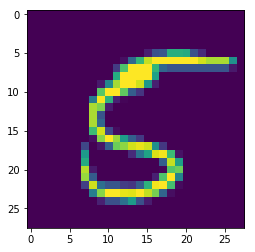

In [12]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [14]:
# Compile the model
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [15]:
# Set a learning rate annealer
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [16]:
# Set epochs and batch size
epochs = 10 
batch_size = 80

In [17]:
#Data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)



In [18]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/10
 - 18s - loss: 0.5749 - acc: 0.8132 - val_loss: 0.1093 - val_acc: 0.9686
Epoch 2/10
 - 13s - loss: 0.1713 - acc: 0.9495 - val_loss: 0.0608 - val_acc: 0.9824
Epoch 3/10
 - 13s - loss: 0.1199 - acc: 0.9625 - val_loss: 0.0421 - val_acc: 0.9881
Epoch 4/10
 - 13s - loss: 0.1046 - acc: 0.9689 - val_loss: 0.0641 - val_acc: 0.9819
Epoch 5/10
 - 13s - loss: 0.0846 - acc: 0.9746 - val_loss: 0.0533 - val_acc: 0.9852
Epoch 6/10
 - 12s - loss: 0.0793 - acc: 0.9757 - val_loss: 0.0361 - val_acc: 0.9888
Epoch 7/10
 - 12s - loss: 0.0729 - acc: 0.9786 - val_loss: 0.0365 - val_acc: 0.9888
Epoch 8/10
 - 12s - loss: 0.0614 - acc: 0.9819 - val_loss: 0.0508 - val_acc: 0.9850
Epoch 9/10
 - 12s - loss: 0.0666 - acc: 0.9801 - val_loss: 0.0317 - val_acc: 0.9900
Epoch 10/10
 - 12s - loss: 0.0564 - acc: 0.9833 - val_loss: 0.0296 - val_acc: 0.9910


In [19]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [20]:
# submitting final csv file
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [21]:
submission[:5]

ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3